Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image 
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import Augmentor


#### Read train and test dataset images

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("CNN_assignment/Test")
data_dir_test = pathlib.Path('CNN_assignment/Train')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118
2239


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create Dataset

In [4]:
#--- Dataset Creation ---
img_size = (180, 180)
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_ds = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 937 images belonging to 9 classes.


In [7]:
val_ds = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 231 images belonging to 9 classes.


In [8]:
#List out all the classes of skin cancer and store them in a list. 
class_names = list(train_ds.class_indices.keys())
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Data Visualisation

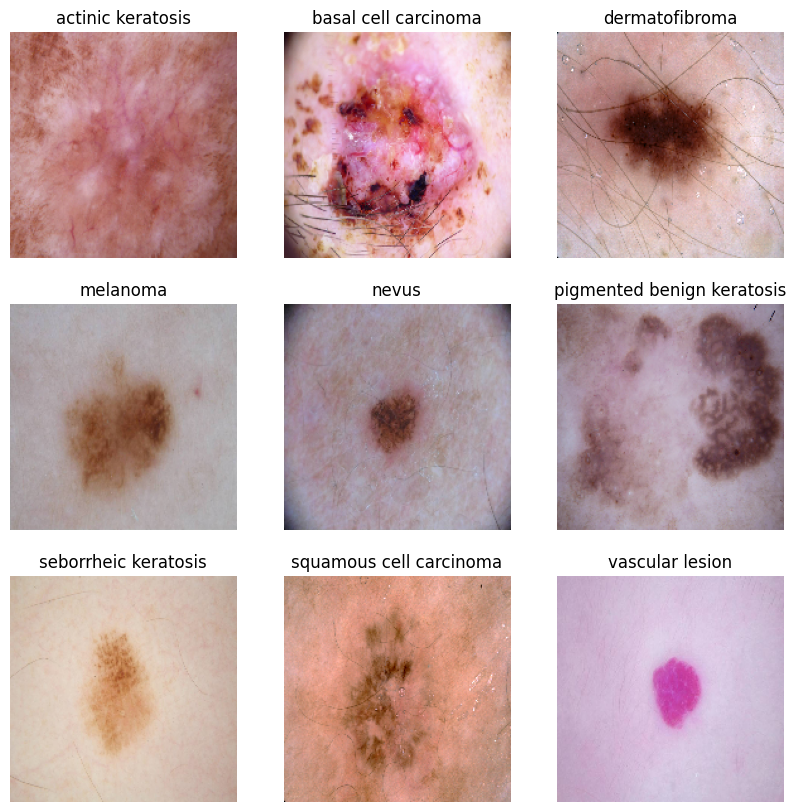

In [9]:
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    found = False  # Flag to check if the class was found
    for x_batch, y_batch in train_ds:
        if i in np.argmax(y_batch, axis=1):  # Check if the class is in this batch
            img_index = np.argmax(y_batch, axis=1).tolist().index(i)
            plt.subplot(3, 3, i+1)
            plt.imshow(x_batch[img_index])
            plt.title(class_name)
            plt.axis("off")
            found = True
            break
    if not found:
        print(f"Class {class_name} not found in any batch.")
plt.show()


### Create the model

In [10]:
def build_model(hasNormalization=False):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.BatchNormalization() if hasNormalization else layers.Identity(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization() if hasNormalization else layers.Identity(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization() if hasNormalization else layers.Identity(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [11]:
model = build_model()

d:\Study\Github-Repos\rr_melanoma_detection_cnn_c64\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the model

In [12]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)


d:\Study\Github-Repos\rr_melanoma_detection_cnn_c64\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 664ms/step - accuracy: 0.5012 - loss: 1.6202 - val_accuracy: 0.9091 - val_loss: 0.4208
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 645ms/step - accuracy: 0.8987 - loss: 0.4934 - val_accuracy: 0.9091 - val_loss: 0.3413
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 612ms/step - accuracy: 0.9202 - loss: 0.3066 - val_accuracy: 0.9264 - val_loss: 0.2485
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 626ms/step - accuracy: 0.9297 - loss: 0.1925 - val_accuracy: 0.9264 - val_loss: 0.2092
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 526ms/step - accuracy: 0.9568 - loss: 0.1488 - val_accuracy: 0.9394 - val_loss: 0.2131
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 570ms/step - accuracy: 0.9502 - loss: 0.1590 - val_accuracy: 0.9394 - val_loss: 0.2201
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 573ms/step - accuracy: 0.9604 - loss: 0.1132 - val_accuracy: 0.9351 - val_loss: 0.2061
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 569ms/step - accuracy: 0.9730 - loss: 0.0770 - val_accu

In [13]:
#view summary of all layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ identity (Identity)             │ (None, 178, 178, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ identity_1 (Identity)           │ (None, 87, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ identity_2 (Identity)           │ (None, 41, 41, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,944,413 (76.08 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,296,276 (50.72 MB)

### Visualizing training results

In [14]:
# Plot training results
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()


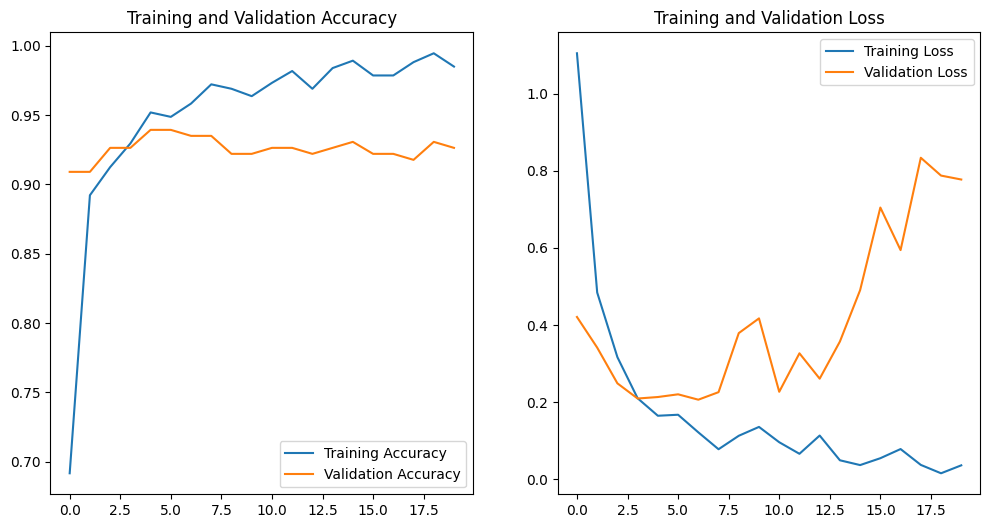

In [15]:
plot_training(history)


## Key Observation:
Slight Overfitting:

The model seems to be performing reasonably well. It's learning from the training data and is able to generalize to some extent. However, there are signs of potential overfitting, especially towards the end of training.

### Data Augmentation Strategy

In [16]:
augmented_train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

In [17]:
augmented_train_dataset = augmented_train_datagen.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 937 images belonging to 9 classes.


In [18]:
val_dataset = augmented_train_datagen.flow_from_directory(
    data_dir_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 231 images belonging to 9 classes.


In [19]:
# Retrain the model
aug_model = build_model()

In [20]:
aug_history = aug_model.fit(
    augmented_train_dataset,
    epochs=20,
    validation_data=val_dataset
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.5881 - loss: 1.3578

d:\Study\Github-Repos\rr_melanoma_detection_cnn_c64\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5939 - loss: 1.3427 - val_accuracy: 0.9048 - val_loss: 0.5832
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8813 - loss: 0.5026 - val_accuracy: 0.9264 - val_loss: 0.3541
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 949ms/step - accuracy: 0.8925 - loss: 0.4748 - val_accuracy: 0.9177 - val_loss: 0.3339
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 885ms/step - accuracy: 0.9080 - loss: 0.4140 - val_accuracy: 0.9264 - val_loss: 0.2868
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 770ms/step - accuracy: 0.9188 - loss: 0.2843 - val_accuracy: 0.9307 - val_loss: 0.2363
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 770ms/step - accuracy: 0.9243 - loss: 0.2303 - val_accuracy: 0.9307 - val_loss: 0.2810
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 779ms/step - accuracy: 0.9249 - loss: 0.2470 - val_accuracy: 0.8874 - val_loss: 0.5094
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 814ms/step - accuracy: 0.9197 - loss: 0.3222 - val_accuracy: 0.9264 - va

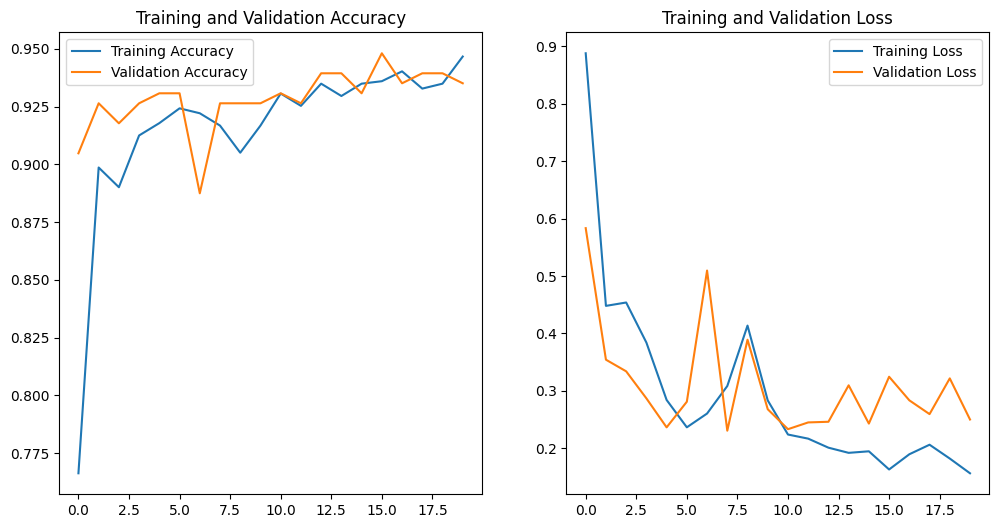

In [21]:
plot_training(aug_history)

### Observations:
- The graph suggests that the model is performing well on the training data but might be overfitting. Overfitting occurs when a model becomes too specialized to the training data and struggles to generalize to new data.

- Training Accuracy: The training accuracy steadily increases with each epoch, reaching a high value around 0.95 (95%). This indicates that the model is learning to make accurate predictions on the training data.
- Validation Accuracy: The validation accuracy also increases initially but then plateaus around 0.93 (93%). This suggests that the model is generalizing well to unseen data, but there's room for improvement.
- Training Loss: The training loss decreases significantly with each epoch, approaching a low value around 0.2 (20%). This indicates that the model is making fewer errors on the training data.
- Validation Loss: The validation loss also decreases initially but then starts to increase again after a few epochs. This suggests that the model might be overfitting to the training data, and its performance on unseen data is starting to suffer.

### Handle Class Imbalance

In [22]:
class_counts = {class_name: len(os.listdir(os.path.join(data_dir_train, class_name))) for class_name in class_names}
print("Class Distribution:", class_counts)

Class Distribution: {'actinic keratosis': 16, 'basal cell carcinoma': 16, 'dermatofibroma': 16, 'melanoma': 16, 'nevus': 16, 'pigmented benign keratosis': 16, 'seborrheic keratosis': 4, 'squamous cell carcinoma': 16, 'vascular lesion': 4}


In [23]:
# Path to the training directory
train_class_dirs = {class_name: os.path.join(data_dir_train, class_name) for class_name in class_names}

# Desired number of samples per class
target_samples = max([len(os.listdir(class_dir)) for class_dir in train_class_dirs.values()])

In [ ]:
# Augment each underrepresented class
for class_name, class_path in train_class_dirs.items():
    current_count = len(os.listdir(class_path))
    if current_count < target_samples:
        print(f"Augmenting class '{class_name}' with {target_samples - current_count} additional samples.")
        
        # Create an Augmentor pipeline
        pipeline = Augmentor.Pipeline(class_path)
        pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        pipeline.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
        pipeline.flip_left_right(probability=0.5)
        pipeline.zoom_random(probability=0.5, percentage_area=0.8)
        pipeline.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

Augmenting class 'seborrheic keratosis' with 12 additional samples.
Initialised with 3 image(s) found.
Output directory set to CNN_assignment\Test\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1231430F940>: 100%|██████████| 500/500 [00:15<00:00, 32.38 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x123142D1BA0>: 100%|██████████| 12/12 [00:00<00:00, 19.90 Samples/s]


Augmenting class 'vascular lesion' with 12 additional samples.
Initialised with 3 image(s) found.
Output directory set to CNN_assignment\Test\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x12314293CA0>: 100%|██████████| 500/500 [00:06<00:00, 74.55 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x12312C6AD40>: 100%|██████████| 12/12 [00:00<00:00, 38.97 Samples/s]


In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

2074


In [26]:
new_class_counts = {class_name: len(os.listdir(os.path.join(data_dir_train, class_name))) for class_name in class_names}
print("New Class Distribution:", new_class_counts)

New Class Distribution: {'actinic keratosis': 16, 'basal cell carcinoma': 16, 'dermatofibroma': 16, 'melanoma': 16, 'nevus': 16, 'pigmented benign keratosis': 16, 'seborrheic keratosis': 4, 'squamous cell carcinoma': 16, 'vascular lesion': 4}


#### Train the model on the data created using Augmentor

In [27]:
# Recreate the ImageDataGenerator for the augmented data
augmented_train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Keep the same validation split
)

In [28]:
# Create the training  datasets
train_dataset = augmented_train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

Found 1755 images belonging to 9 classes.


In [29]:
# Create the validation datasets
val_dataset = augmented_train_datagen.flow_from_directory(
    data_dir_train,
    target_size=(180, 180),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 437 images belonging to 9 classes.


In [32]:
#build model with dropout and nomalization
def build_model_with_dropout(hasNormalization=False):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.BatchNormalization() if hasNormalization else layers.Identity(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),  # Dropout after pooling

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization() if hasNormalization else layers.Identity(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization() if hasNormalization else layers.Identity(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Dropout before final layer
        layers.Dense(len(class_names), activation='softmax')  # Adjust output to number of classes
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [33]:
# model-building function using normalization
norm_model = build_model_with_dropout(True)

d:\Study\Github-Repos\rr_melanoma_detection_cnn_c64\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Train the model on the augmented data
augmented_history = norm_model.fit(
    train_dataset,
    epochs= 30,  # Train for 30 epochs
    validation_data=val_dataset
)

d:\Study\Github-Repos\rr_melanoma_detection_cnn_c64\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8504 - loss: 5.3230 - val_accuracy: 0.0069 - val_loss: 89.5441
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9377 - loss: 1.9752 - val_accuracy: 0.0114 - val_loss: 72.7819
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9586 - loss: 1.1969 - val_accuracy: 0.4828 - val_loss: 19.5528
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9523 - loss: 1.1574 - val_accuracy: 0.4737 - val_loss: 27.7765
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9625 - loss: 0.7468 - val_accuracy: 0.4760 - val_loss: 13.7256
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9499 - loss: 0.7728 - val_accuracy: 0.4737 - val_loss: 15.5480
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9639 - loss: 0.6024 - val_accuracy: 0.9497 - val_loss: 1.5590
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9596 - loss: 0.5692 - val_accuracy: 0.9474 - val

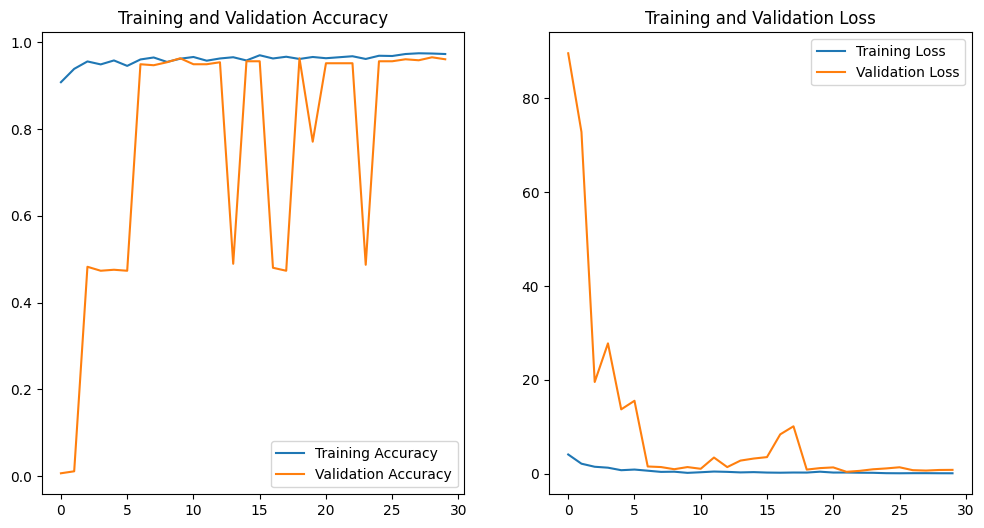

In [35]:

# Plot training and validation accuracy and loss
plot_training(augmented_history)

### Observation

- The model is overfitting to the training data. This is evident from the large gap between the training and validation accuracy/loss curves. The model is performing well on the training data but struggles to generalize to unseen data.

In [36]:
# model-building function using normalization
un_norm_model = build_model_with_dropout()

d:\Study\Github-Repos\rr_melanoma_detection_cnn_c64\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Train the model on the augmented data
unnorm_augmented_history = un_norm_model.fit(
    train_dataset,
    epochs= 20,  # Train for 20 epochs
    validation_data=val_dataset
)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 564ms/step - accuracy: 0.4842 - loss: 2.8697 - val_accuracy: 0.4783 - val_loss: 1.0993
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 593ms/step - accuracy: 0.8542 - loss: 0.6302 - val_accuracy: 0.9519 - val_loss: 0.7526
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 609ms/step - accuracy: 0.9538 - loss: 0.2415 - val_accuracy: 0.9519 - val_loss: 0.2299
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 607ms/step - accuracy: 0.9491 - loss: 0.1846 - val_accuracy: 0.9519 - val_loss: 0.2194
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 576ms/step - accuracy: 0.9569 - loss: 0.1472 - val_accuracy: 0.9519 - val_loss: 0.1678
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 572ms/step - accuracy: 0.9519 - loss: 0.1518 - val_accuracy: 0.9542 - val_loss: 0.1387
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 585ms/step - accuracy: 0.9550 - loss: 0.1472 - val_accuracy: 0.9542 - val_loss: 0.1508
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 585ms/step - accuracy: 0.9568 - loss: 0.1208 - val_accu

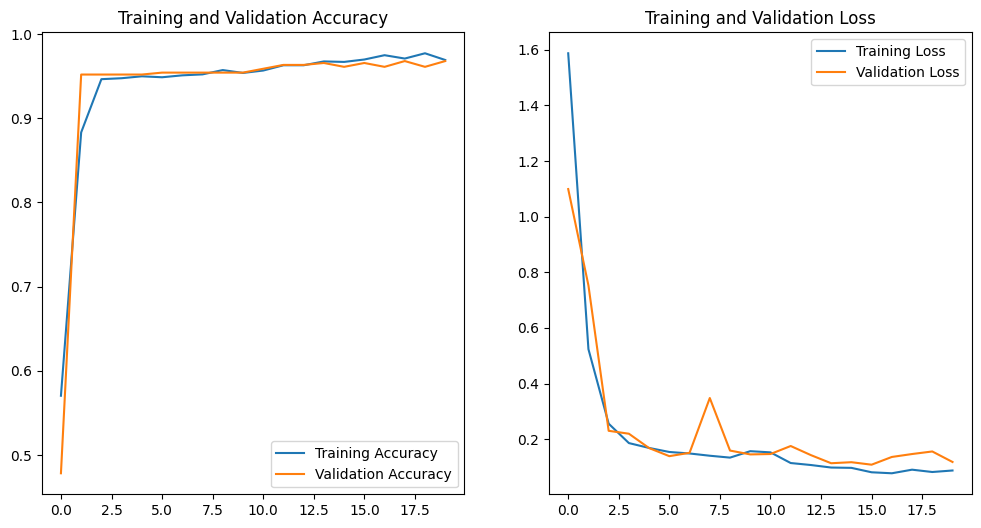

In [38]:

# Plot training and validation accuracy and loss
plot_training(unnorm_augmented_history)

### Observation 
The model seems to be performing reasonably well. It achieves a high accuracy on both the training and validation data.
However, the increasing validation loss suggests that the model might be overfitting. This means that the model is learning the training data too well and is not generalizing well to unseen data.